In [87]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
Sales_January_2019 = pd.read_csv("Sales_January_2019.csv")

In [78]:

Sales_January_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [59]:
print(Sales_January_2019.shape)

(9697, 6)


In [28]:
Sales_January_2019.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"
9722,150501,Google Phone,1,600,01/13/19 16:43,"428 Cedar St, Boston, MA 02215"


In [41]:
Sales_January_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9697 entries, 0 to 9696
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 454.7+ KB


In [106]:
Sales_January_2019.describe(include='all').T

,count,unique,top,freq
Order ID,9697,9269,Order ID,16
Product,9697,20,USB-C Charging Cable,1171
Quantity Ordered,9697,8,1,8795
Price Each,9697,19,11.95,1171
Order Date,9697,8077,Order Date,16
Purchase Address,9697,9161,Purchase Address,16


In [46]:
df = Sales_January_2019.copy()

In [54]:
df.isnull().sum()*100/df.shape[0]

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

In [63]:
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nColumns with missing values:\n", (df.isnull()).sum())

Data shape: (9697, 6)

Data types:
 Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Columns with missing values:
 Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [58]:
df_nan1 = Sales_January_2019[Sales_January_2019.isnull().values.any(axis=1)]
df_nan1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [84]:
list_of_numeric_columns = ['Quantity Ordered']



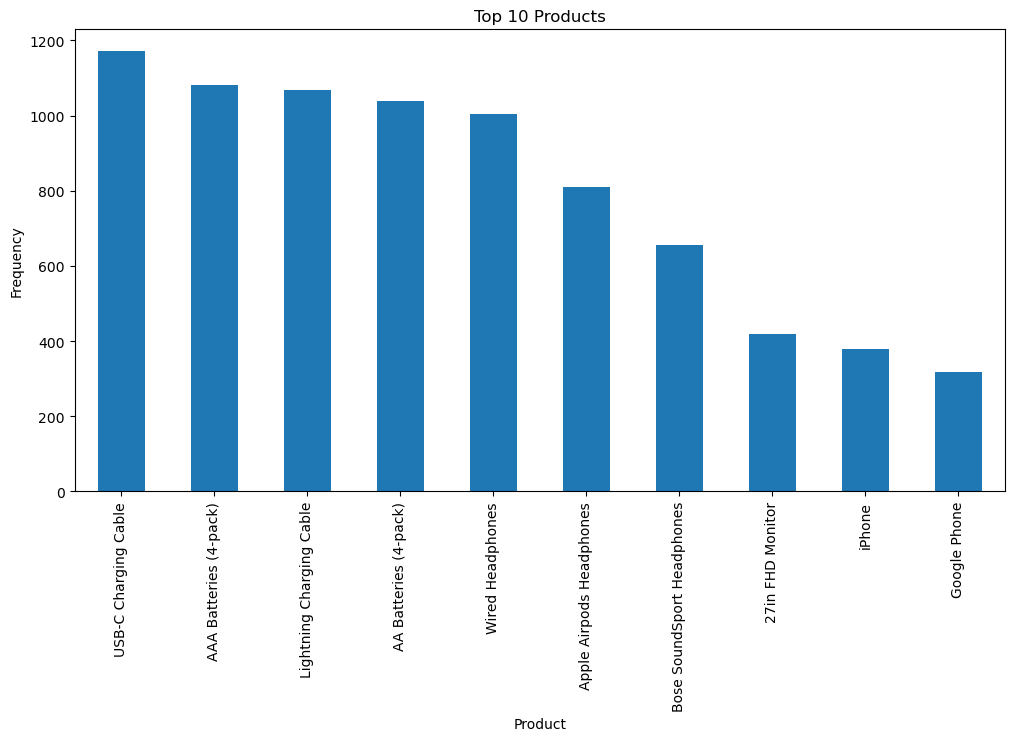

In [90]:
plt.figure(figsize=(12, 6))
df['Product'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 10 Products')
plt.show()

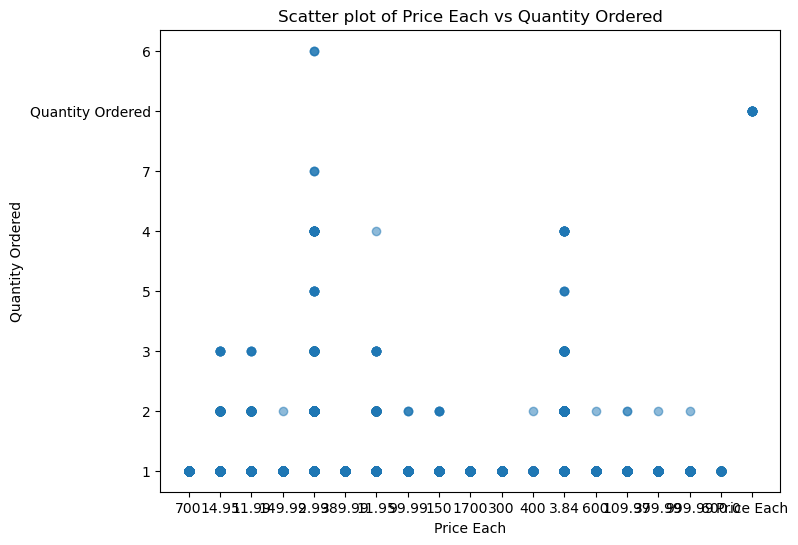

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Price Each'], df['Quantity Ordered'], alpha=0.5)
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.title('Scatter plot of Price Each vs Quantity Ordered')
plt.show()

In [97]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')


In [98]:
product_order_counts = df.groupby('Product')['Quantity Ordered'].sum()
top_products = product_order_counts.nlargest(5)

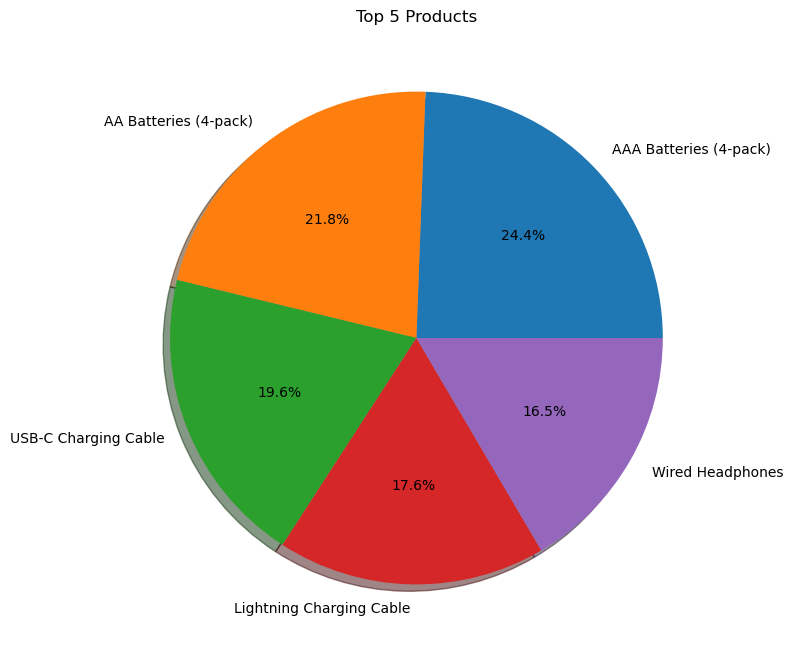

In [101]:
plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', shadow=True)
plt.gca().set_aspect('equal')
plt.title('Top 5 Products')
plt.show()

In [130]:
def fix_order_date(date_str):
    try:
        return pd.to_datetime(date_str, format="%m/%d/%y %H:%M")
    except:
        return pd.NaT  # Trả về giá trị null nếu không thể chuyển đổi thành ngày tháng

df['Order Date'] = df['Order Date'].apply(fix_order_date)


In [104]:
print(df['Order Date'].head())

0   2019-01-22 21:25:00
1   2019-01-28 14:15:00
2   2019-01-17 13:33:00
3   2019-01-05 20:33:00
4   2019-01-25 11:59:00
Name: Order Date, dtype: datetime64[ns]


In [107]:
order_date_counts = df['Order Date'].value_counts().sort_index()

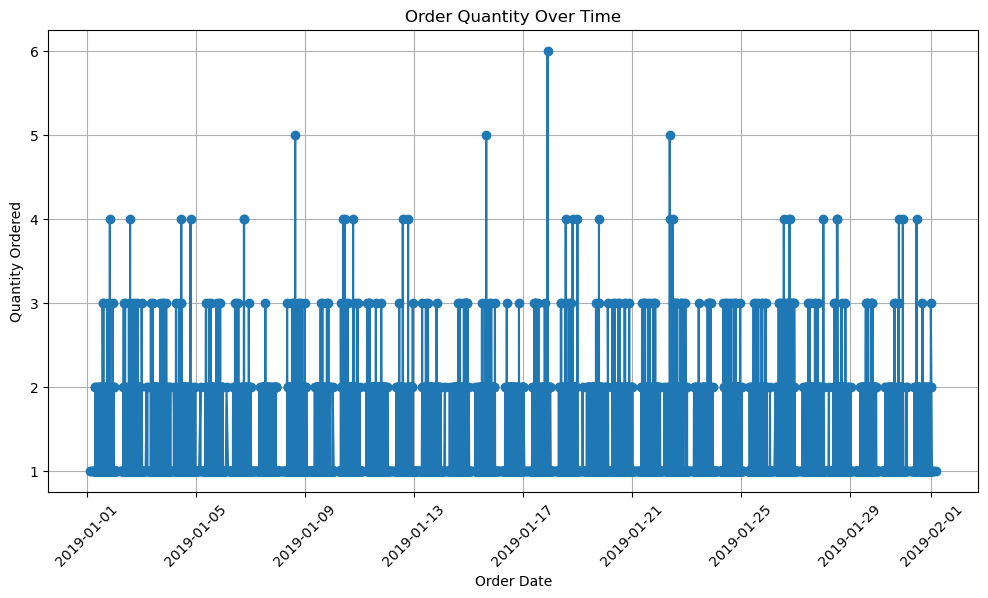

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(order_date_counts.index, order_date_counts.values, marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Quantity Ordered')
plt.title('Order Quantity Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

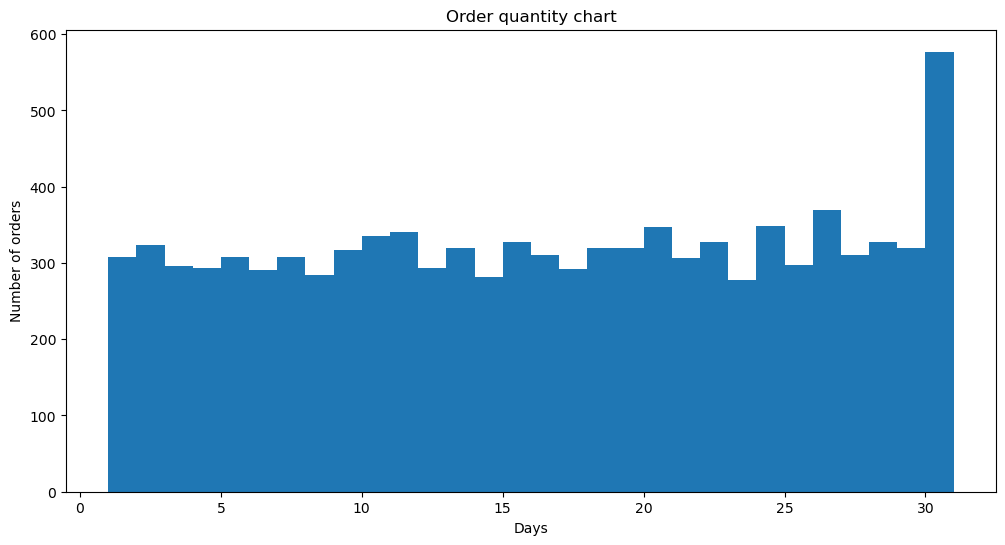

In [110]:
plt.figure(figsize=(12, 6))
df['Order Date'].dt.day.plot.hist(bins=30)
plt.title('Order quantity chart')
plt.xlabel('Days')
plt.ylabel('Number of orders')
plt.show()


In [111]:
top_5_days = df.groupby(df['Order Date'].dt.day)['Quantity Ordered'].sum().nlargest(5)
print("Top 5 ngày có số lượng đặt hàng cao nhất:")
print(top_5_days)

Top 5 ngày có số lượng đặt hàng cao nhất:
Order Date
26.0    423.0
24.0    391.0
20.0    385.0
2.0     368.0
10.0    368.0
Name: Quantity Ordered, dtype: float64


In [115]:
print(df.dtypes)




Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [131]:
df = df[df['Price Each'] != 'Price Each']


In [118]:
df['Price Each'] = df['Price Each'].astype(float)
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']


In [119]:
revenue_by_product = df.groupby('Product')['Revenue'].sum().reset_index()

In [120]:
top_products_by_revenue = revenue_by_product.nlargest(10, 'Revenue')

print(top_products_by_revenue)

                       Product    Revenue
13          Macbook Pro Laptop  399500.00
18                      iPhone  265300.00
14             ThinkPad Laptop  216997.83
9                 Google Phone  190800.00
6     Apple Airpods Headphones  122100.00
1       27in 4K Gaming Monitor  121676.88
3       34in Ultrawide Monitor  119316.86
8                Flatscreen TV   72900.00
7   Bose SoundSport Headphones   65893.41
2             27in FHD Monitor   62845.81


In [123]:
revenue_per_day = df.groupby('Order Date')['Revenue'].sum()

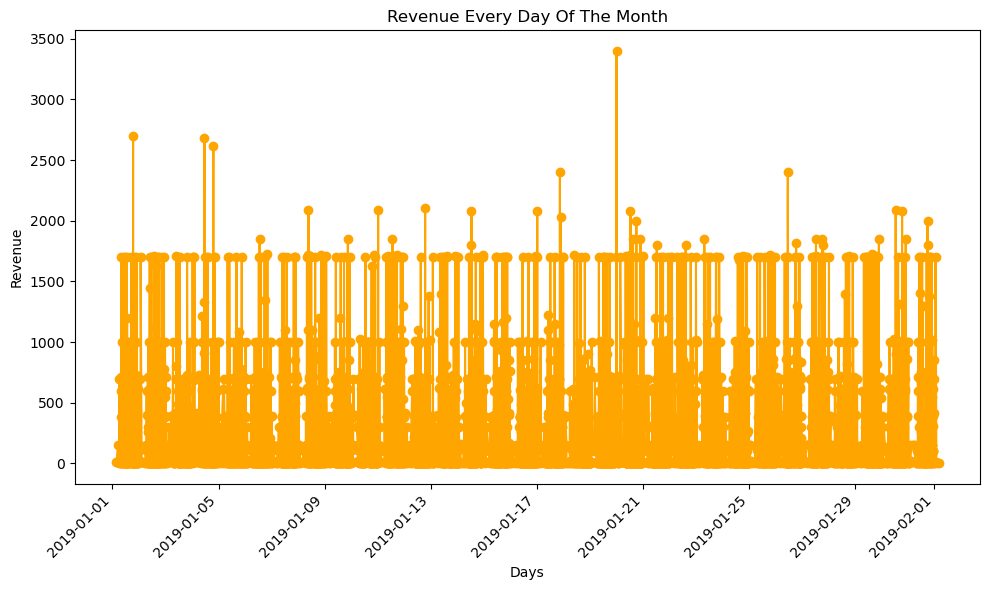

In [129]:
plt.figure(figsize=(10, 6))
revenue_per_day.plot(kind='line', marker='o', color='orange')
plt.title('Revenue Every Day Of The Month')
plt.xlabel('Days')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
top_5_days = df.groupby('Order Date')['Quantity Ordered'].sum().nlargest(5)

In [127]:
top_5_revenue_days = revenue_per_day.nlargest(5)


In [128]:
print(top_5_revenue_days)

Order Date
2019-01-20 00:15:00    3400.00
2019-01-01 18:39:00    2699.99
2019-01-04 11:15:00    2679.99
2019-01-04 19:20:00    2619.98
2019-01-17 21:00:00    2400.00
Name: Revenue, dtype: float64
